In [1]:
import numpy as np
import cv2
import os

# Function to load nose coordinates from file
def load_coordinates(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0],int(data[5]),int(data[6])]) # Extract nose coordinates
    return coordinates

def crop_noses(coordinates, size=(25, 30)):
    cropped_noses = []
    j=0
    files_directory = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            full_path = os.path.join(files_directory, coord[0])
            face_image = cv2.imread(full_path)
            x, y = coord[1], coord[2]
            cropped_nose = face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2]
            cropped_noses.append(cropped_nose)
    return cropped_noses



In [2]:
file = "list_landmarks_align_celeba.txt"
coordinates = load_coordinates(file)
cropped_noses = crop_noses(coordinates)
mean_nose = np.mean(cropped_noses, axis=0)
mean_nose_uint8 = mean_nose.astype(np.uint8)

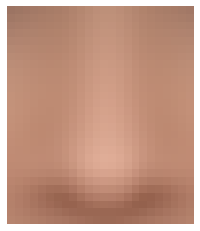

In [3]:
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(mean_nose_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb.astype(np.uint8))
plt.axis('off')  # Para ocultar los ejes
plt.show()

Adding a mean nose to all images

In [4]:
def replace_nose(coordinates, size=(25, 30)):
    cropped_noses = []
    j=0
    files_directory = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    output_directory = "/home/constanza/tfg/TFG/thesis/nose_alteration"
    for coord in coordinates:
        img_id = coord[0] 
        if int(img_id.split('.')[0])>= 182638:
            full_path = os.path.join(files_directory, img_id)
            face_image = cv2.imread(full_path)
            x, y = coord[1], coord[2]
            face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2] = mean_nose_uint8
            j+=1
            rgb_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)


In [7]:
replace_nose(coordinates)

In [8]:
import csv

def replace_nose_with_delta(coordinates, delta, size=(25, 30)):
    cropped_noses = []
    j = 0
    files_directory = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    output_directory = "/home/constanza/tfg/TFG/thesis/nose_alteration"
    
    with open('parsed_files/attractive_classified.csv', 'r') as file:
        lines = csv.reader(file)
        attractive = []
        next(lines)
        for line in lines:
            img_id = line[0]
            attractive.append(img_id)
            
    with open('parsed_files/NO_attractive_classified.csv', 'r') as file:
        lines = csv.reader(file)
        not_attractive = []
        next(lines)
        for line in lines:
            img_id = line[0]
            not_attractive.append(img_id)
            
    with open('parsed_files/celeba-att-female-test.csv', 'r') as file:
        lines = csv.reader(file)
        female = []
        next(lines)
        for line in lines:
            img_id = line[0]
            female.append(img_id)
            
    with open('parsed_files/celeba-att-male-test.csv', 'r') as file:
        lines = csv.reader(file)
        male = []
        next(lines)
        for line in lines:
            img_id = line[0]
            male.append(img_id)
            
    for coord in coordinates:
        img_id = coord[0] 
        if int(img_id.split('.')[0]) >= 182638 and (img_id in male):
            full_path = os.path.join(files_directory, img_id)
            face_image = cv2.imread(full_path)
            x, y = coord[1], coord[2]
            nose = face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2]
            face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2] = mean_nose_uint8 * delta + nose * (1 - delta)
            j += 1
            rgb_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)
        elif int(img_id.split('.')[0]) >= 182638 and (img_id in female):
            full_path = os.path.join(files_directory, img_id)
            face_image = cv2.imread(full_path)
            x, y = coord[1], coord[2]
            nose = face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2]
            face_image[y - (size[1]//4)*3:y + size[1]//4, x - size[0]//2:x + size[0]//2] = mean_nose_uint8 * delta + nose * (1 - delta)
            j += 1
            rgb_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)


In [82]:
replace_nose_with_delta(coordinates,0.8)

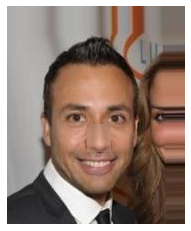

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/constanza/tfg/TFG/thesis/nose_alteration/182970.jpg')
plt.imshow(img)
plt.axis('off') 
plt.show()